In [19]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf

In [23]:
yf.pdr_override() # <== that's all it takes :-)
stock = pdr.get_data_yahoo('MDB', 
                          start=datetime.datetime(2018, 10, 1), 
                          end=datetime.datetime(2019, 3, 1))
stock.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-01,81.51,82.10,78.51,78.86,78.86,720200
2018-10-02,75.24,76.75,74.02,76.11,76.11,1624500
2018-10-03,76.01,76.83,74.60,76.20,76.20,801800
2018-10-04,75.66,76.40,72.02,73.95,73.95,1067200
2018-10-05,72.96,74.88,70.81,72.75,72.75,829200


In [24]:
# Inspect the index 
stock.index

# Inspect the columns
stock.columns

# Select only the last 10 observations of `Close`
ts = stock['Close'][-10:]

# Check the type of `ts` 
type(ts)

pandas.core.series.Series

In [25]:
# Inspect the first rows of November-December 18
print(stock.loc[pd.Timestamp('2018-11-01'):pd.Timestamp('2018-12-31')].head())

# Inspect the first rows of 2019 
print(stock.loc['2019'].head())


             Open   High    Low  Close  Adj Close   Volume
Date                                                      
2018-11-01  81.50  81.99  77.63  80.91      80.91  1068100
2018-11-02  80.50  81.22  79.24  79.69      79.69   781600
2018-11-05  79.56  79.56  75.90  78.13      78.13   730400
2018-11-06  77.96  80.00  75.64  76.06      76.06   672400
2018-11-07  78.89  84.03  78.00  82.10      82.10  1500800
             Open   High    Low  Close  Adj Close   Volume
Date                                                      
2019-01-02  81.40  82.58  78.11  79.95      79.95  1325100
2019-01-03  77.70  79.50  75.00  75.89      75.89  1157800
2019-01-04  77.85  83.89  77.29  81.73      81.73  1214700
2019-01-07  83.05  89.20  82.75  85.70      85.70  1158900
2019-01-08  88.00  90.59  85.08  89.99      89.99  1414200


In [26]:
# Sample 20 rows
sample = stock.sample(20)

# Print `sample`
print(sample)

# Resample to monthly level 
monthly_stock = stock.resample('M')

# Print `monthly_aapl`
print(monthly_stock)

              Open    High     Low   Close  Adj Close   Volume
Date                                                          
2019-01-09   89.10   89.50   84.36   86.62      86.62  1964700
2018-12-06   83.00   92.03   80.30   90.74      90.74  3475300
2018-11-13   69.53   72.25   68.26   69.35      69.35   901600
2018-12-28   83.45   83.50   78.78   80.50      80.50  1009700
2018-10-16   66.23   71.32   65.36   70.30      70.30  1131500
2018-10-26   68.87   73.30   68.25   71.26      71.26  1188400
2018-12-10   83.60   86.71   79.13   83.05      83.05  1538600
2019-01-23   82.00   86.22   81.68   84.09      84.09  1408900
2019-01-29   88.56   89.47   86.81   86.99      86.99   920500
2019-01-28   84.35   88.85   84.13   88.39      88.39   786700
2019-02-28  100.47  104.28  100.15  101.56     101.56   843400
2018-10-25   67.08   72.77   67.00   72.52      72.52  1081800
2018-11-16   78.74   84.53   77.94   82.90      82.90  2036700
2018-11-21   73.09   75.48   70.60   73.95      73.95  

In [27]:
# Add a column `diff` to `aapl` 
stock['diff'] = stock.Open - stock.Close

# Delete the new `diff` column
del stock['diff']

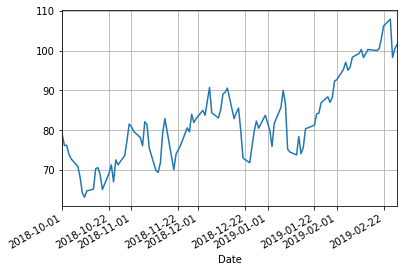

In [28]:
# Import Matplotlib's `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Plot the closing prices for `aapl`
stock['Close'].plot(grid=True)

# Show the plot
plt.show()

# Common Financial Analysis

## Returns

In [29]:
# Assign `Adj Close` to `daily_close`
daily_close = stock[['Adj Close']]

# Daily returns
daily_pct_c = daily_close.pct_change()

# Replace NA values with 0
daily_pct_c.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_c)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns)

            Adj Close
Date                 
2018-10-01   0.000000
2018-10-02  -0.034872
2018-10-03   0.001182
2018-10-04  -0.029528
2018-10-05  -0.016227
2018-10-08  -0.025979
2018-10-09  -0.037962
2018-10-10  -0.058237
2018-10-11  -0.017134
2018-10-12   0.025198
2018-10-15   0.006956
2018-10-16   0.079214
2018-10-17   0.003272
2018-10-18  -0.024670
2018-10-19  -0.054514
2018-10-22   0.063038
2018-10-23   0.030662
2018-10-24  -0.059921
2018-10-25   0.082550
2018-10-26  -0.017375
2018-10-29   0.032837
2018-10-30   0.050136
2018-10-31   0.054470
2018-11-01  -0.007239
2018-11-02  -0.015078
2018-11-05  -0.019576
2018-11-06  -0.026494
2018-11-07   0.079411
2018-11-08  -0.009135
2018-11-09  -0.072895
...               ...
2019-01-16  -0.055485
2019-01-17   0.020932
2019-01-18   0.062698
2019-01-22   0.011078
2019-01-23   0.035209
2019-01-24   0.002141
2019-01-25   0.031209
2019-01-28   0.017146
2019-01-29  -0.015839
2019-01-30   0.013795
2019-01-31   0.047284
2019-02-01   0.003356
2019-02-04

In [31]:
# Resample `stock` to business months, take last observation as value 
monthly = stock.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-31,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-30,0.054003,0.005325,0.003162,0.017178,0.017178,0.051395
2018-12-31,-0.016199,0.012360,0.033661,0.010133,0.010133,-0.235759
2019-01-31,0.079400,0.076977,0.077083,0.102938,0.102938,-0.224880
2019-02-28,0.135254,0.125891,0.134073,0.099610,0.099610,-0.184096


In [32]:
# Resample `stock` to quarters, take the mean as value per quarter
quarter = stock.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-31,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-28,0.199231,0.200975,0.203105,0.202619,0.202619,0.131957
